In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings("ignore") 

In [2]:
df = pd.read_csv("PBL5recommendationdata.csv", encoding = "latin-1")

In [3]:
df.shape

(4194, 181)

In [4]:
pd.set_option("display.max_columns", None)                  # for seeing all columns of df
pd.set_option("display.max_rows", None)                        # for seeing all rows of df 
df.head(20)

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,64.29,NaN,6993607863,510142,NaN,1,1426019099,1.438868e+09,1.426101e+09,NaN,Insured By Eye4Fraud,NaN,NaN,NaN,NaN,NaN,NaN,0.0,528

In [5]:
var = df.isnull().sum()
print(var.to_string())

Customers.id                         0
Customers.fname                      0
Customers.lname                      0
Customers.company                 3467
Customers.create_date                0
Customers.status                  4093
Customers.mailing                 2080
Customers.reminders               4194
Customers.tax_exempt              4189
Customers.account_id              4191
Customers.sales_rep               4194
Customers.rewards                 4194
Customers.profile_id              4194
Customers.last_modified              0
Customers.customer_type            423
Orders.id                            0
Orders.customer_id                   0
Orders.fname                         0
Orders.lname                         0
Orders.company                    3466
Orders.order_number                  0
Orders.reorder_id                 4112
Orders.external_source            3829
Orders.external_id                4189
Orders.currency                      0
Orders.sales_rep         

In [6]:
df = df.dropna(axis=1, thresh=int(0.8*len(df)))           #We delete columns which have more than %80 null value. 

In [7]:
df.shape

(4194, 66)

In [8]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.order_number,Orders.currency,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.shipping_carrier,Orders.shipping_method,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_type,Orders.payment_amount,Orders.payment_id,Orders.payment_code,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Products.id,Products.status,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.list_price,Products.price,Products.cost,Products.last_modified,Products.shopping_brand,Products.shopping_mpn,Products.shopping_flags,Products.amazon_item_type,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.long_description,Products.seo_title,Products.seo_url,Products.unit,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.family_id,Products.saved_status
0,797,Christy,Dill,1426018724,1437764306,0.0,3758,797,Christy,Dill,3758,USD,57.20,0.0,9.95,64.29,fedex,11|Ground,5.7204E+14,3.0,1.426019e+09,authorize.net,64.29,6993607863,510142,1,1426019099,1.438868e+09,1.426101e+09,0.0,5284,3758,2310.0,"Basic Rollators, Green",1,57.20,44.00,2310.0,0.0,sub-product-detail.html,1.0,3.0,"Basic Steel Rollators,Green","Basic Lightweight Rollators For Adults, With S...",80.70,57.64,44.00,1.463163e+09,MEDLINE,MDS86850EGS,62.0,health-care-products,generic/online%3Aen%3AUS%3A2310,"Walking Aids > Rollators, & Walkers > Rollators",Health & Beauty > Health Care,8000064C-1434298761,1.450325e+09,"<ul><li> Classically designed, value priced</...","Basic Lightweight Rollators For Adults, With S...",Basic-Rollators-For-Adults-With-Seat-Green-6-W...,EA,24.80,7.50,30.40,PF61071,0.0
1,3,John,Smith,1386089139,1437764354,0.0,23,3,John,Smith,23,USD,20.00,NaN,9.99,29.99,fedex,11|Ground,1.28597E+14,3.0,1.386090e+09,authorize.net,29.99,0,0,1,1386090455,1.440529e+09,1.386103e+09,0.0,31,23,177.0,"Urinary Drain Bags,0.000",4,5.00,1.87,177.0,1.0,sub-product-detail.html,1.0,3.0,Urinary Drain Bags,Urinary Drain Bags,14.41,10.29,1.87,1.462370e+09,MEDLINE,DYNC1674H,62.0,health-care-products,NaN,"Incontinence, Urology & Ostomy > Urology > Dra...",Health & Beauty > Health Care,80008C35-1438901283,1.450322e+09,<ul><li> Only Medline drain bags have a slide...,Urinary Drain Bags | MEDLINE - DYNC1674H,Urinary-Drain-Bags0000,EA,8.00,7.00,1.50,PF02132,NaN
2,3,John,Smith,1386089139,1437764354,0.0,9531,3,John,Smith,9531,USD,68.78,0.0,9.95,78.73,manual,0|Standard Shipping,NaN,3.0,1.449604e+09,authorize.net,78.73,0,0,3,1449603652,1.450213e+09,NaN,0.0,11655,9531,1.0,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",1,68.78,52.50,1.0,0.0,sub-product-detail.html,1.0,3.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large","SensiCare Nitrile Exam Gloves, Blue, XX-Large",96.29,68.78,52.50,1.463163e+09,MEDLINE,484805,62.0,health-care-products,generic/online%3Aen%3AUS%3A1,Apparel > Gloves > Nonsterile PF LF Synthetic ...,Health & Beauty > Health Care,800087BB-1438898332,1.450321e+09,<ul><li> SensiCare&reg; nitrile exam gloves fe...,"Nitrile Exam Gloves, Blue, XX-Large | MEDLINE ...",SensiCare-Nitrile-Exam-GlovesBlueXX-Large,CS,13.23,10.04,10.24,PF00342,0.0
3,4,James,Anderson,1386780263,1437762646,0.0,29,4,James,Anderson,29,USD,19.56,0.0,9.95,29.55,NaN,11|Ground,7.96468E+14,3.0,1.386780e+09,NaN,29.55,NaN,NaN,1,1386780263,1.440529e+09,1.386800e+09,0.0,1816,29,983.0,Basket for 2-Button Walkers,1,19.56,12.62,983.0,0.0,sub-product-detail.html,1.0,3.0,Basket for 2-Button Walkers,Basket for 2-Button Walkers,27.38,19.56,12.62,1.462595e+09,MEDLINE,MDS86615KH,62.0,health-care-products,NaN,"Walking Ai

In [9]:
df.drop(["Customers.create_date","Customers.last_modified","Orders.id","Orders.customer_id","Orders.tracking","Orders.payment_date","Orders.payment_id","Orders.payment_code","Orders.placed_date","Orders.updated_date","Orders.shipped_date","Order_Items.id","Order_Items.parent","Order_Items.product_id","Products.id","Products.status","Products.template","Products.vendor","Products.import_id","Products.amazon_item_type","Products.google_shopping_id","Products.google_shopping_type","Products.last_modified","Products.shopping_mpn","Products.shopping_flags","Products.shopping_mpn","Products.shopping_flags","Products.quickbooks_id","Products.qb_edit_sequence","Products.long_description","Products.family_id","Products.saved_status"],inplace=True,axis=1)

In [10]:
df.shape

(4194, 36)

In [11]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.customer_type,Orders.fname,Orders.lname,Orders.order_number,Orders.currency,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.shipping_carrier,Orders.shipping_method,Orders.payment_status,Orders.payment_type,Orders.payment_amount,Orders.status,Orders.customer_type,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Products.name,Products.display_name,Products.list_price,Products.price,Products.cost,Products.shopping_brand,Products.google_shopping_cat,Products.seo_title,Products.seo_url,Products.unit,Products.shipping_length,Products.shipping_width,Products.shipping_height
0,797,Christy,Dill,0.0,Christy,Dill,3758,USD,57.20,0.0,9.95,64.29,fedex,11|Ground,3.0,authorize.net,64.29,1,0.0,"Basic Rollators, Green",1,57.20,44.00,"Basic Steel Rollators,Green","Basic Lightweight Rollators For Adults, With S...",80.70,57.64,44.00,MEDLINE,Health & Beauty > Health Care,"Basic Lightweight Rollators For Adults, With S...",Basic-Rollators-For-Adults-With-Seat-Green-6-W...,EA,24.80,7.50,30.40
1,3,John,Smith,0.0,John,Smith,23,USD,20.00,NaN,9.99,29.99,fedex,11|Ground,3.0,authorize.net,29.99,1,0.0,"Urinary Drain Bags,0.000",4,5.00,1.87,Urinary Drain Bags,Urinary Drain Bags,14.41,10.29,1.87,MEDLINE,Health & Beauty > Health Care,Urinary Drain Bags | MEDLINE - DYNC1674H,Urinary-Drain-Bags0000,EA,8.00,7.00,1.50
2,3,John,Smith,0.0,John,Smith,9531,USD,68.78,0.0,9.95,78.73,manual,0|Standard Shipping,3.0,authorize.net,78.73,3,0.0,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",1,68.78,52.50,"SensiCare Nitrile Exam Gloves,Blue,XX-Large","SensiCare Nitrile Exam Gloves, Blue, XX-Large",96.29,68.78,52.50,MEDLINE,Health & Beauty > Health Care,"Nitrile Exam Gloves, Blue, XX-Large | MEDLINE ...",SensiCare-Nitrile-Exam-GlovesBlueXX-Large,CS,13.23,10.04,10.24
3,4,James,Anderson,0.0,James,Anderson,29,USD,19.56,0.0,9.95,29.55,NaN,11|Ground,3.0,NaN,29.55,1,0.0,Basket for 2-Button Walkers,1,19.56,12.62,Basket for 2-Button Walkers,Basket for 2-Button Walkers,27.38,19.56,12.62,MEDLINE,Health & Beauty > Health Care,Basket for 2-Button Walkers | MEDLINE - MDS866...,Basket-for-2-Button-Walkers-2,EA,10.60,7.80,18.50
4,5,Abraham,Pollak,0.0,Abraham,Pollak,30,USD,36.05,NaN,9.95,46.00,fedex,11|Ground,3.0,NaN,46.00,1,0.0,Tens Units,1,36.05,25.75,TENS 3000 Analog Unit,TENS 3000 Analog Unit,50.47,36.05,25.75,ROSCOE MEDICAL INC,Health & Beauty > Health Care,TENS 3000 Analog Unit | ROSCOE MEDICAL INC - M...,Tens-Units,EA,8.50,2.75,12.00


In [12]:
df["Products.shipping_length"].unique()

array([2.4800e+01, 8.0000e+00, 1.3230e+01, 1.0600e+01, 8.5000e+00,
              nan, 1.3600e+01, 1.7500e+01, 1.0250e+01, 2.3300e+01,
       2.8000e+01, 2.0000e+00, 1.0700e+01, 1.2200e+01, 1.2000e+01,
       1.4500e+01, 1.9500e+01, 3.4150e+00, 1.3000e+01, 2.6000e+01,
       3.0000e+00, 6.8750e+00, 1.9000e+01, 3.6501e+01, 2.0250e+01,
       3.6000e+00, 3.5440e+00, 9.7500e+00, 2.0900e+01, 3.2500e+00,
       1.2250e+01, 1.2240e+01, 4.0000e+00, 2.2500e+00, 1.5800e+01,
       1.3500e+01, 2.2800e+01, 1.8000e+01, 1.2500e+01, 6.0000e+00,
       1.5250e+01, 4.5000e+00, 3.0600e+01, 1.8500e+01, 1.6400e+01,
       3.3500e+01, 2.1200e+01, 2.1000e+01, 6.5000e+00, 1.3938e+01,
       8.2500e+00, 1.6000e+01, 2.6750e+01, 1.0000e+01, 1.4000e+01,
       1.5000e+01, 5.5000e+00, 1.1500e+01, 2.2400e+01, 1.3250e+01,
       5.0000e+00, 2.6200e+01, 2.3000e+01, 1.7130e+01, 3.6000e+01,
       3.4000e+01, 2.0750e+01, 4.8000e+00, 3.7000e+01, 3.2500e+01,
       7.0000e+00, 8.4000e+00, 1.0500e+01, 1.7100e+01, 2.2050e

In [13]:
df.isnull().sum()

Customers.id                      0
Customers.fname                   0
Customers.lname                   0
Customers.customer_type         423
Orders.fname                      0
Orders.lname                      0
Orders.order_number               0
Orders.currency                   0
Orders.subtotal                   0
Orders.tax                      457
Orders.shipping                 195
Orders.total                      0
Orders.shipping_carrier         617
Orders.shipping_method          443
Orders.payment_status             5
Orders.payment_type             384
Orders.payment_amount            18
Orders.status                     0
Orders.customer_type            183
Order_Items.product_name          0
Order_Items.qty                   0
Order_Items.price                 0
Order_Items.cost                  3
Products.name                   157
Products.display_name           532
Products.list_price             177
Products.price                  158
Products.cost               

In [14]:
df["Products.shipping_length"] = df["Products.shipping_length"].fillna(df["Products.shipping_length"].mean())  
df["Products.shipping_width"] = df["Products.shipping_width"].fillna(df["Products.shipping_width"].mean())  
df["Products.shipping_height"] = df["Products.shipping_height"].fillna(df["Products.shipping_height"].mean())  


In [15]:
df.isnull().sum()

Customers.id                      0
Customers.fname                   0
Customers.lname                   0
Customers.customer_type         423
Orders.fname                      0
Orders.lname                      0
Orders.order_number               0
Orders.currency                   0
Orders.subtotal                   0
Orders.tax                      457
Orders.shipping                 195
Orders.total                      0
Orders.shipping_carrier         617
Orders.shipping_method          443
Orders.payment_status             5
Orders.payment_type             384
Orders.payment_amount            18
Orders.status                     0
Orders.customer_type            183
Order_Items.product_name          0
Order_Items.qty                   0
Order_Items.price                 0
Order_Items.cost                  3
Products.name                   157
Products.display_name           532
Products.list_price             177
Products.price                  158
Products.cost               

In [16]:
df["Products.shipping_length"].unique()

array([2.48000000e+01, 8.00000000e+00, 1.32300000e+01, 1.06000000e+01,
       8.50000000e+00, 1.72082161e+01, 1.36000000e+01, 1.75000000e+01,
       1.02500000e+01, 2.33000000e+01, 2.80000000e+01, 2.00000000e+00,
       1.07000000e+01, 1.22000000e+01, 1.20000000e+01, 1.45000000e+01,
       1.95000000e+01, 3.41500000e+00, 1.30000000e+01, 2.60000000e+01,
       3.00000000e+00, 6.87500000e+00, 1.90000000e+01, 3.65010000e+01,
       2.02500000e+01, 3.60000000e+00, 3.54400000e+00, 9.75000000e+00,
       2.09000000e+01, 3.25000000e+00, 1.22500000e+01, 1.22400000e+01,
       4.00000000e+00, 2.25000000e+00, 1.58000000e+01, 1.35000000e+01,
       2.28000000e+01, 1.80000000e+01, 1.25000000e+01, 6.00000000e+00,
       1.52500000e+01, 4.50000000e+00, 3.06000000e+01, 1.85000000e+01,
       1.64000000e+01, 3.35000000e+01, 2.12000000e+01, 2.10000000e+01,
       6.50000000e+00, 1.39380000e+01, 8.25000000e+00, 1.60000000e+01,
       2.67500000e+01, 1.00000000e+01, 1.40000000e+01, 1.50000000e+01,
      

In [17]:
df['Product_Volume']=df["Products.shipping_length"]*df["Products.shipping_width"]*df["Products.shipping_height"]

In [18]:
df["Products.google_shopping_cat"].unique()

array(['Health & Beauty > Health Care', nan,
       'Health & Beauty > Health Care > Mobility & Accessibility > Accessibility Equipment > Wheelchairs',
       'Health & Beauty > Health Care > Mobility & Accessibility > Accessibility Equipment > Wheelchairs > Manual Wheelchairs',
       'Health & Beauty > Health Care > Mobility & Accessibility > Walking Aids > Walkers',
       'Health & Beauty > Health Care > Biometric Monitor Accessories > Blood Pressure Monitor Accessories > Blood Pressure Monitor Cuffs'],
      dtype=object)

In [19]:
df.shape

(4194, 37)

In [20]:
df.isnull().sum()

Customers.id                      0
Customers.fname                   0
Customers.lname                   0
Customers.customer_type         423
Orders.fname                      0
Orders.lname                      0
Orders.order_number               0
Orders.currency                   0
Orders.subtotal                   0
Orders.tax                      457
Orders.shipping                 195
Orders.total                      0
Orders.shipping_carrier         617
Orders.shipping_method          443
Orders.payment_status             5
Orders.payment_type             384
Orders.payment_amount            18
Orders.status                     0
Orders.customer_type            183
Order_Items.product_name          0
Order_Items.qty                   0
Order_Items.price                 0
Order_Items.cost                  3
Products.name                   157
Products.display_name           532
Products.list_price             177
Products.price                  158
Products.cost               

In [21]:
df["Order_Items.cost"] = df["Order_Items.cost"].fillna(df["Order_Items.cost"].mean())  
df["Products.list_price"] = df["Products.list_price"].fillna(df["Products.list_price"].mean())  

In [22]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.customer_type,Orders.fname,Orders.lname,Orders.order_number,Orders.currency,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.shipping_carrier,Orders.shipping_method,Orders.payment_status,Orders.payment_type,Orders.payment_amount,Orders.status,Orders.customer_type,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Products.name,Products.display_name,Products.list_price,Products.price,Products.cost,Products.shopping_brand,Products.google_shopping_cat,Products.seo_title,Products.seo_url,Products.unit,Products.shipping_length,Products.shipping_width,Products.shipping_height,Product_Volume
0,797,Christy,Dill,0.0,Christy,Dill,3758,USD,57.20,0.0,9.95,64.29,fedex,11|Ground,3.0,authorize.net,64.29,1,0.0,"Basic Rollators, Green",1,57.20,44.00,"Basic Steel Rollators,Green","Basic Lightweight Rollators For Adults, With S...",80.70,57.64,44.00,MEDLINE,Health & Beauty > Health Care,"Basic Lightweight Rollators For Adults, With S...",Basic-Rollators-For-Adults-With-Seat-Green-6-W...,EA,24.80,7.50,30.40,5654.400000
1,3,John,Smith,0.0,John,Smith,23,USD,20.00,NaN,9.99,29.99,fedex,11|Ground,3.0,authorize.net,29.99,1,0.0,"Urinary Drain Bags,0.000",4,5.00,1.87,Urinary Drain Bags,Urinary Drain Bags,14.41,10.29,1.87,MEDLINE,Health & Beauty > Health Care,Urinary Drain Bags | MEDLINE - DYNC1674H,Urinary-Drain-Bags0000,EA,8.00,7.00,1.50,84.000000
2,3,John,Smith,0.0,John,Smith,9531,USD,68.78,0.0,9.95,78.73,manual,0|Standard Shipping,3.0,authorize.net,78.73,3,0.0,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",1,68.78,52.50,"SensiCare Nitrile Exam Gloves,Blue,XX-Large","SensiCare Nitrile Exam Gloves, Blue, XX-Large",96.29,68.78,52.50,MEDLINE,Health & Beauty > Health Care,"Nitrile Exam Gloves, Blue, XX-Large | MEDLINE ...",SensiCare-Nitrile-Exam-GlovesBlueXX-Large,CS,13.23,10.04,10.24,1360.171008
3,4,James,Anderson,0.0,James,Anderson,29,USD,19.56,0.0,9.95,29.55,NaN,11|Ground,3.0,NaN,29.55,1,0.0,Basket for 2-Button Walkers,1,19.56,12.62,Basket for 2-Button Walkers,Basket for 2-Button Walkers,27.38,19.56,12.62,MEDLINE,Health & Beauty > Health Care,Basket for 2-Button Walkers | MEDLINE - MDS866...,Basket-for-2-Button-Walkers-2,EA,10.60,7.80,18.50,1529.580000
4,5,Abraham,Pollak,0.0,Abraham,Pollak,30,USD,36.05,NaN,9.95,46.00,fedex,11|Ground,3.0,NaN,46.00,1,0.0,Tens Units,1,36.05,25.75,TENS 3000 Analog Unit,TENS 3000 Analog Unit,50.47,36.05,25.75,ROSCOE MEDICAL INC,Health & Beauty > Health Care,TENS 3000 Analog Unit | ROSCOE MEDICAL INC - M...,Tens-Units,EA,8.50,2.75,12.00,280.500000


In [23]:
df.corr()

,Customers.id,Customers.customer_type,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.payment_status,Orders.payment_amount,Orders.status,Orders.customer_type,Order_Items.qty,Order_Items.price,Order_Items.cost,Products.list_price,Products.price,Products.cost,Products.shipping_length,Products.shipping_width,Products.shipping_height,Product_Volume
Customers.id,1.000000,0.363692,-0.032623,-0.040149,-0.004721,-0.037907,-0.088350,-0.046010,0.168347,0.320346,-0.002762,-0.040332,-0.047219,-0.052989,-0.058560,-0.058923,-0.154728,-0.140353,-0.147246,-0.154014
Customers.customer_type,0.363692,1.000000,0.003044,-0.029548,0.054341,0.001774,-0.041817,0.002917,0.087517,0.989429,-0.011297,0.014796,0.013318,-0.012142,0.001668,0.005810,-0.056582,-0.068867,-0.069842,-0.076148
Orders.subtotal,-0.032623,0.003044,1.000000,0.177628,-0.187054,0.997013,-0.070188,0.990861,0.075186,-0.010004,0.391748,0.418261,0.415571,0.354614,0.400565,0.410412,0.154753,0.166582,0.070604,0.143425
Orders.tax,-0.040149,-0.029548,0.177628,1.000000,-0.036849,0.199910,0.013744,0.205453,0.001236,-0.028662,-0.007837,0.251157,0.242604,0.335597,0.258188,0.253854,0.091756,0.091345,0.042990,0.095956
Orders.shipping,-0.004721,0.054341,-0.187054,-0.036849,1.000000,-0.176824,0.021926,-0.169647,-0.001266,0.047076,-0.053611,-0.151783,-0.151408,-0.145961,-0.150744,-0.144953,-0.100748,-0.074340,0.013191,-0.043352
Orders.total,-0.037907,0.001774,0.997013,0.199910,-0.176824,1.000000,-0.074068,0.992953,0.077309,-0.011299,0.384124,0.428587,0.425830,0.368125,0.412019,0.422208,0.156791,0.171595,0.072968,0.148607
Orders.payment_status,-0.088350,-0.041817,-0.070188,0.013744,0.021926,-0.074068,1.000000,-0.022278,-0.095230,-0.033632,0.000922,-0.044985,-0.035927,-0.027423,-0.050019,-0.041631,0.025660,-0.006075,-0.004317,0.001298
Orders.payment_amount,-0.046010,0.002917,0.990861,0.205453,-0.169647,0.992953,-0.022278,1.000000,0.065107,-0.007760,0.398148,0.423907,0.421165,0.362342,0.401927,0.413152,0.156248,0.159134,0.081051,0.147946
Orders.status,0.168347,0.087517,0.075186,0.001236,-0.001266,0.077309,-0.095230,0.065107,1.000000,0.065587,0.060926,0.002314,0.002961,0.003887,0.003120,0.003804,-0.028688,-0.017276,-0.040529,-0.032544
Orders.customer_type,0.320346,0.989429,-0.010004,-0.028662,0.047076,-0.011299,-0.033632,-0.007760,0.065587,1.000000,-0.009475,0.007971,0.006894,-0.013572,-0.003395,-0.000005,-0.051939,-0.062949,-0.057114,-0.067242


In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [25]:
import matplotlib.pyplot as plt

In [26]:
x = df[["Orders.total","Order_Items.qty","Products.shipping_height", "Products.list_price"]]
# "Order_Items.cost", "Product_Volume"

In [27]:
x.head()

,Orders.total,Order_Items.qty,Products.shipping_height,Products.list_price
0,64.29,1,30.40,80.70
1,29.99,4,1.50,14.41
2,78.73,1,10.24,96.29
3,29.55,1,18.50,27.38
4,46.00,1,12.00,50.47


In [28]:
model = KMeans(n_clusters = 4)

In [29]:
model = model.fit(x)

In [30]:
tahmin = model.predict(x)

In [31]:
tahmin

array([0, 0, 0, ..., 1, 0, 0])

In [32]:
x["cluster"] = tahmin

In [33]:
x = x.rename(columns={'Orders.total': 'Orders_total', 'Order_Items.qty': 'Order_Items.qty', 'Products.shipping_length': 'Products_shipping_length', 'Products.shipping_height': 'Products_shipping_height', "Products.list_price": "Products_list_price"})

In [34]:
x.head(50)

,Orders_total,Order_Items.qty,Products_shipping_height,Products_list_price,cluster
0,64.29,1,30.400000,80.700000,0
1,29.99,4,1.500000,14.410000,0
2,78.73,1,10.240000,96.290000,0
3,29.55,1,18.500000,27.380000,0
4,46.00,1,12.000000,50.470000,0
5,54.41,1,11.592447,121.683321,0
6,24.58,1,11.592447,121.683321,0
7,49.14,1,11.300000,54.870000,0
8,69.70,1,10.000000,84.290000,0
9,34.00,1,11.592447,121.683321,0


In [35]:
silhouette_score(x,tahmin)

0.8547290854784251

### Elbow Method

In [36]:
clust = x.assign(Cluster = model.labels_)
model.cluster_centers_.astype("int")
model.labels_

array([0, 0, 0, ..., 1, 0, 0])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


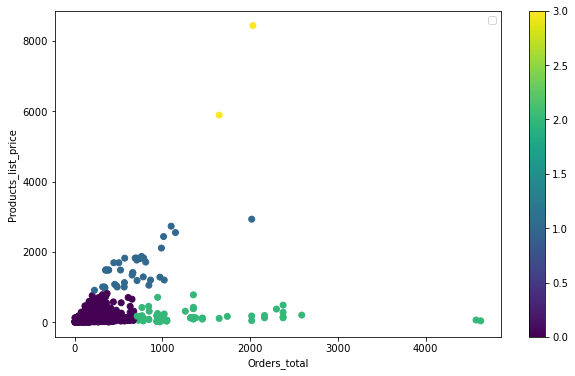

In [37]:
plt.figure(figsize=(10,6))
plt.scatter(x.Orders_total,x.Products_list_price,c=tahmin)
plt.ylabel("Products_list_price")
plt.xlabel("Orders_total")
plt.legend()
plt.colorbar()
plt.show()

### Predicticting the silhouette score for each clusters 

In [38]:
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust (clusters): 
    for no_of_cluster in np.arange(1,clusters):                      # 1,clusters --- Creates number from 1 to cluster number. no_of_cluster+=1
        no_of_cluster+=1                                             # Creates number by adding 1
        model=KMeans(n_clusters = no_of_cluster)
        model=model.fit(x)
        pred=model.fit_predict(x)
        sum_of_squared_distances.append(model.inertia_)             # Calculates differences.
        score = silhouette_score(x,pred)                            # Calculates Silhouette score .
        print("Number of cluster {},silhouette{}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(9)

Number of cluster 2,silhouette0.887009737791109
Number of cluster 3,silhouette0.852876162617527
Number of cluster 4,silhouette0.8547290854784251
Number of cluster 5,silhouette0.5688151253075289
Number of cluster 6,silhouette0.5675498212226315
Number of cluster 7,silhouette0.6044208039347155
Number of cluster 8,silhouette0.5988227859219939
Number of cluster 9,silhouette0.5605068881606353


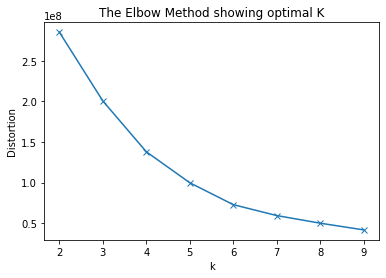

In [39]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimal K')
plt.show()  